In [1]:
import pandas as pd
from matplotlib import pyplot as plt

We first focus on F

In [30]:
# RK-4 set up
def rk4(f1, f2, f3, h, FValues, num_iter):
    "this function performs RK-4"
    
    steps = list(range(num_iter))
    
    for i in steps:
        
        k11 = h*f1(FValues['f_prime'][i])
        k12 = h*f2(FValues['f_prime_2'][i])
        k13 = h*f3(FValues['f'][i], FValues['f_prime_2'][i])

        k21 = h*f1(FValues['f_prime'][i] + k12/2)
        k22 = h*f2(FValues['f_prime_2'][i] + k13/2)
        k23 = h*f3(FValues['f'][i] + k11/2, FValues['f_prime_2'][i] + k13/2)

        k31 = h*f1(FValues['f_prime'][i] + k22/2)
        k32 = h*f2(FValues['f_prime_2'][i] + k23/2)
        k33 = h*f3(FValues['f'][i] + k21/2, FValues['f_prime_2'][i] + k23/2)

        k41 = h*f1(FValues['f_prime'][i] + k32)
        k42 = h*f2(FValues['f_prime_2'][i] + k33)
        k43 = h*f3(FValues['f'][i] + k31, FValues['f_prime_2'][i] + k33)

        f = FValues['f'][i] + (1/6)*(k11 + 2*k21 + 2*k31 + k41)
        f_prime = FValues['f_prime'][i]  + (1/6)*(k12 + 2*k22 + 2*k32 + k42)
        f_dbl_prime = FValues['f_prime_2'][i] + (1/6)*(k13 + 2*k23 + 2*k33 + k43)
        
        FValues['eta'].append(i*h+h)
        FValues['f'].append(f)
        FValues['f_prime'].append(f_prime)
        FValues['f_prime_2'].append(f_dbl_prime)
                   
    return FValues

# Functions at hand
def y1(u2):
    "This is from f'=y2"
    y = u2
    return y

def y2(u3):
    "This is from f''=y3"
    y = u3
    return y

def y3(u1, u3):
    "This is from y'''=0.5(f*f'')"
    y = -0.5 * u1 * u3
    return y

In [31]:
#f_list = rk4(f1=y2, f2=y3, f3=y4, h=0.1, FValues=res, num_iter=100)

In [32]:
x_lower = 0
x_upper = 10

test_val = -1 #this is what we want to get

while abs(x_upper - x_lower) >= 10**(-6):
        
    # Trying values of f''
    x_test = (x_upper + x_lower)/2
    res = {'eta':[0], 'f':[0], 'f_prime': [0], 'f_prime_2' : [x_test]}
    
    res_f = rk4(f1=y1, f2=y2, f3=y3, h=0.1, FValues=res, num_iter=100)
    
    if (res_f['f_prime'][-1]-1)*test_val < 0:
        x_upper = x_test
    else:
        x_lower = x_test
        test_val = res_f['f_prime'][-1] -1

In [33]:
pd.DataFrame(res_f).head(10)

,eta,f,f_prime,f_prime_2
0,0.0,0.000000,0.000000,0.332057
1,0.1,0.001660,0.033205,0.332048
2,0.2,0.006641,0.066408,0.331983
3,0.3,0.014941,0.099598,0.331809
4,0.4,0.026560,0.132764,0.331469
5,0.5,0.041493,0.165885,0.330911
6,0.6,0.059735,0.198937,0.330079
7,0.7,0.081277,0.231890,0.328922
8,0.8,0.106108,0.264709,0.327389
9,0.9,0.134213,0.297354,0.325432


In [34]:
pd.DataFrame(res_f).tail(10)

,eta,f,f_prime,f_prime_2
91,9.1,7.379205,0.999999,2.864030e-07
92,9.2,7.479205,0.999999,1.975556e-07
93,9.3,7.579205,0.999999,1.355914e-07
94,9.4,7.679205,0.999999,9.259901e-08
95,9.5,7.779204,0.999999,6.292336e-08
96,9.6,7.879204,0.999999,4.254505e-08
97,9.7,7.979204,0.999999,2.862318e-08
98,9.8,8.079204,0.999999,1.916102e-08
99,9.9,8.179204,0.999999,1.276297e-08
100,10.0,8.279204,0.999999,8.458961e-09


In [35]:
#res = {'eta':[0], 'f':[0], 'f_prime': [0],  'f_prime_2': [5]}
#pd.DataFrame(rk4(f1=y1, f2=y2, f3=y3, h=0.1, FValues=res, num_iter=101)).tail(10)

# Should get 6.09777 for f_prime

We now look at G

In [36]:
def y4(u4):
    "This is equivalent to g' = y4"
    
    y = u4
    return y

def y5(Pr, u1, u4):
    "This is equivalent to: G''=-0.5*Pr*F*G'"
    y = -0.5*Pr*u1*u4
    return y

# RK-4 set up
def rk4_G(prandl, f1, f2, f3, h, FValues, num_iter):
    "this function performs RK-4"
    
    steps = list(range(num_iter))
    
    for i in steps:
        
        k11 = h*f1(FValues['f_prime'][i])
        k12 = h*f2(FValues['g_prime'][i])
        k13 = h*f3(prandl, FValues['f'][i], FValues['g_prime'][i])

        k21 = h*f1(FValues['f_prime'][i] + k12/2)
        k22 = h*f2(FValues['g_prime'][i] + k13/2)
        k23 = h*f3(prandl, FValues['f'][i] + k11/2, FValues['g_prime'][i] + k13/2)

        k31 = h*f1(FValues['f_prime'][i] + k22/2)
        k32 = h*f2(FValues['g_prime'][i] + k23/2)
        k33 = h*f3(prandl, FValues['f'][i] + k21/2, FValues['g_prime'][i] + k23/2)

        k41 = h*f1(FValues['f_prime'][i] + k32)
        k42 = h*f2(FValues['g_prime'][i] + k33)
        k43 = h*f3(prandl, FValues['f'][i] + k31, FValues['g_prime'][i] + k33)

        g = FValues['g'][i]  + (1/6)*(k12 + 2*k22 + 2*k32 + k42)
        g_prime = FValues['g_prime'][i] + (1/6)*(k13 + 2*k23 + 2*k33 + k43)
        
        FValues['g'].append(g)
        FValues['g_prime'].append(g_prime)
                   
    return FValues

In [44]:
gp_lower = -10
gp_upper = 10

gtest_val = -1
Pr = 5

while abs(gp_upper - gp_lower) >= 10**(-6):
        
    # Trying values of f''
    gp_test = (gp_upper + gp_lower)/2
    res_g = res_f
    res_g['g'] = [1]
    res_g['g_prime'] = [gp_test]
    
    res_all = rk4_G(prandl = Pr, f1=y1, f2=y4, f3=y5, h=0.1, FValues=res_g, num_iter=100)
    
    if (res_all['g'][-1])*gtest_val < 0:
        gp_upper = gp_test
    else:
        gp_lower = gp_test
        gtest_val = res_f['g'][-1]

We define:

$v_1 = \frac{v}{U_{\infty}} \sqrt{\frac{x}{L}}\sqrt{Re} = \frac{1}{2}[\eta F'(\eta) - F(\eta)]$

$v_2 = \frac{u}{U_{\infty}} = F'(\eta)$

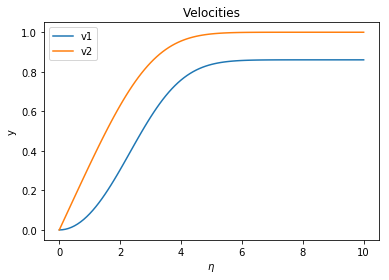

In [45]:
def v1(x):
    eta_index = res_all['eta'].index(x)
    y = 0.5*(x*res_all['f_prime'][eta_index] - res_all['f'][eta_index])
    return y

def v2(x):
    eta_index = res_all['eta'].index(x)
    y = res_all['f_prime'][eta_index]
    return y

x = res_df.eta
v1_y = list(map(lambda x: v1(x), x))
v2_y = list(map(lambda x: v2(x), x))

plt.plot(x, v1_y, label = "v1")
plt.plot(x, v2_y, label = "v2")

plt.legend(loc='upper left')

plt.xlabel("$\eta$")
plt.ylabel("y")
plt.title('Velocities')
plt.show()

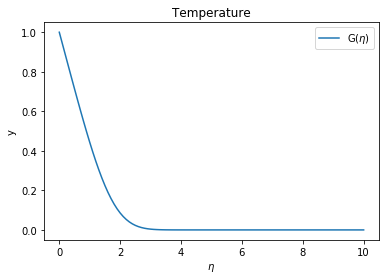

In [46]:
plt.plot(x, res_all['g'], label = "G($\eta$)")

plt.legend(loc='upper right')

plt.xlabel("$\eta$")
plt.ylabel("y")
plt.title('Temperature')
plt.show()

** NEED TO ADD PLOTS FOR DIFF VALUES OF PR BASED ON #7**

**NEED TO FIND TEMP OF BOUNDARY LAYER**

In [14]:
res_df.to_csv('Project1.csv')

In [75]:
def L4(x, xs, ys):
    "This is a Lagrange poly of degree 3 (with 4 points)"
    
    x0 = xs[0]
    x1 = xs[1]
    x2 = xs[2]
    x3 = xs[3]
    
    y0 = ys[0]
    y1 = ys[1]
    y2 = ys[2]
    y3 = ys[3]
    
    p0 = (x-x1)*(x-x2)*(x-x3)/((x0-x1)*(x0-x2)*(x0-x3))
    p1 = (x-x0)*(x-x2)*(x-x3)/((x1-x0)*(x1-x2)*(x1-x3))
    p2 = (x-x0)*(x-x1)*(x-x3)/((x2-x0)*(x2-x1)*(x2-x3))
    p3 = (x-x0)*(x-x1)*(x-x2)/((x3-x0)*(x3-x1)*(x3-x2))
    
    y = p0*y0+p1*y1+p2*y2+p3*y3
    
    return y

def find_index(x_list, y_list, target, side = 'above'):
    "this is to find the points for L4"
    
    for i in range(len(y_list)):
        if side == "above":
            if y_list[i] < target and y_list[i+1] > target:
                im1 = i
                break
        if side == "below":
            if y_list[i] < target and y_list[i+1] < target:
                im1 = i
                break
    
    ip1 = im1 + 1
    ip2 = im1 + 2
    im2 = im1 - 1
    
    return list([im2, im1, ip1, ip2])

i_list = find_index(res_all['eta'], res_all['f_prime'], 0.99, 'above')
etas = list(res_df.eta[i_list])
f_primes = list(res_df.f_prime[i_list])

eta_m = L4(0.99, f_primes, etas)
eta_m

4.9100188905399271

In [48]:
i_list = find_index(res_all['eta'], res_all['g'], 0.01, 'below')
getas = list(res_df.eta[i_list])
gs = list(res_df.g[i_list])

eta_t = L4(0.01, gs, getas)
eta_t

2.7524296636032712

In [102]:
def run_prandl(prandl, f_res):
    "This function generates G and G' and gets values for the two etas"
    
    gp_lower = -10
    gp_upper = 10

    gtest_val = -1
    Pr = prandl

    while abs(gp_upper - gp_lower) >= 10**(-6):

        # Trying values of f''
        gp_test = (gp_upper + gp_lower)/2
        res_g = f_res
        res_g['g'] = [1]
        res_g['g_prime'] = [gp_test]

        res_rk4 = rk4_G(prandl = Pr, f1=y1, f2=y4, f3=y5, h=0.1, FValues=res_g, num_iter=100)

        if (res_rk4['g'][-1])*gtest_val < 0:
            gp_upper = gp_test
        else:
            gp_lower = gp_test
            gtest_val = res_f['g'][-1]
        
    res_rk4_df = pd.DataFrame(res_rk4)
    i_list = find_index(res_rk4_df['eta'], res_rk4_df['g'], 0.01, 'below')
    getas = list(res_rk4_df.eta[i_list])
    gs = list(res_rk4_df.g[i_list])
    
    eta_t = L4(0.01, gs, getas)
    print('Eta value for Pr = ' + str(prandl) + ': ' + str(eta_t))
    return list([eta_t])

In [103]:
Pr_tsts = [0.1, 0.2, 0.5, 1, 5, 10]

eta_ts = list(map(lambda x: run_prandl(x, res_f), Pr_tsts))

Eta value for Pr = 0.1: 9.63755274798
Eta value for Pr = 0.2: 8.88636455389
Eta value for Pr = 0.5: 6.43712218399
Eta value for Pr = 1: 4.91063932216
Eta value for Pr = 5: 2.7524296636
Eta value for Pr = 10: 2.17230685679
